## 6.3 Fashion MNIST 데이터세트에 적용하기
5장에서는 주로 Dense레이어를 사용해서 Fashion MNIST의 분류 문제를 풀었다면, 6장에서는 Convolution layer와 Pooling layer등을 사용해서 분류 문제를 풀 때 퍼포먼스가 얼마나 개선될 수 있는지 살펴보기로 하자.

## 데이터세트 불러오기 및 정규화

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

tf.keras에서 Fashin MNIST 데이터세트를 불러오고 정규화하는 부분은 5장과 같지만, 5장에서는 Dense레이어에 훈련데이터와 테스트데이터를 통과시켰던 것과는 다르게 6장에서는 Conv2D레이어로 컨볼루션 연산을 해야 한다. 이미지는 보통 채널을 가지고 있고(컬러이미지는 RGB의 3채널, 흑백이미지는 1채널), Conv2D레이어는 채널을 가진 형태의 데이터를 받도록 기본적으로 설정돼 있기 때문에 우리는 채널을 갖도록 데이터의 shape을 바꾼다.

In [3]:
# reshape 이전
print(f"Before reshape : {train_X.shape}, {test_X.shape}")

# 흑백이미지 데이터로 1개의 채널을 갖기 때문에 reshape()을 사용해서 데이터의 가장 뒤쪽에 채널 차원을 추가한다.
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(f"After reshape : {train_X.shape}, {test_X.shape}")

Before reshape : (60000, 28, 28), (10000, 28, 28)
After reshape : (60000, 28, 28, 1), (10000, 28, 28, 1)


In [12]:
import os
print(os.getcwd())

E:\TENSORFLOW_2023


## 나눔 글꼴 설치

In [13]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "./fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

{0: '티셔츠/상의', 1: '바지', 2: '스웨터', 3: '드레스', 4: '코트', 5: '샌들', 6: '셔츠', 7: '운동화', 8: '가방', 9: '부츠'}


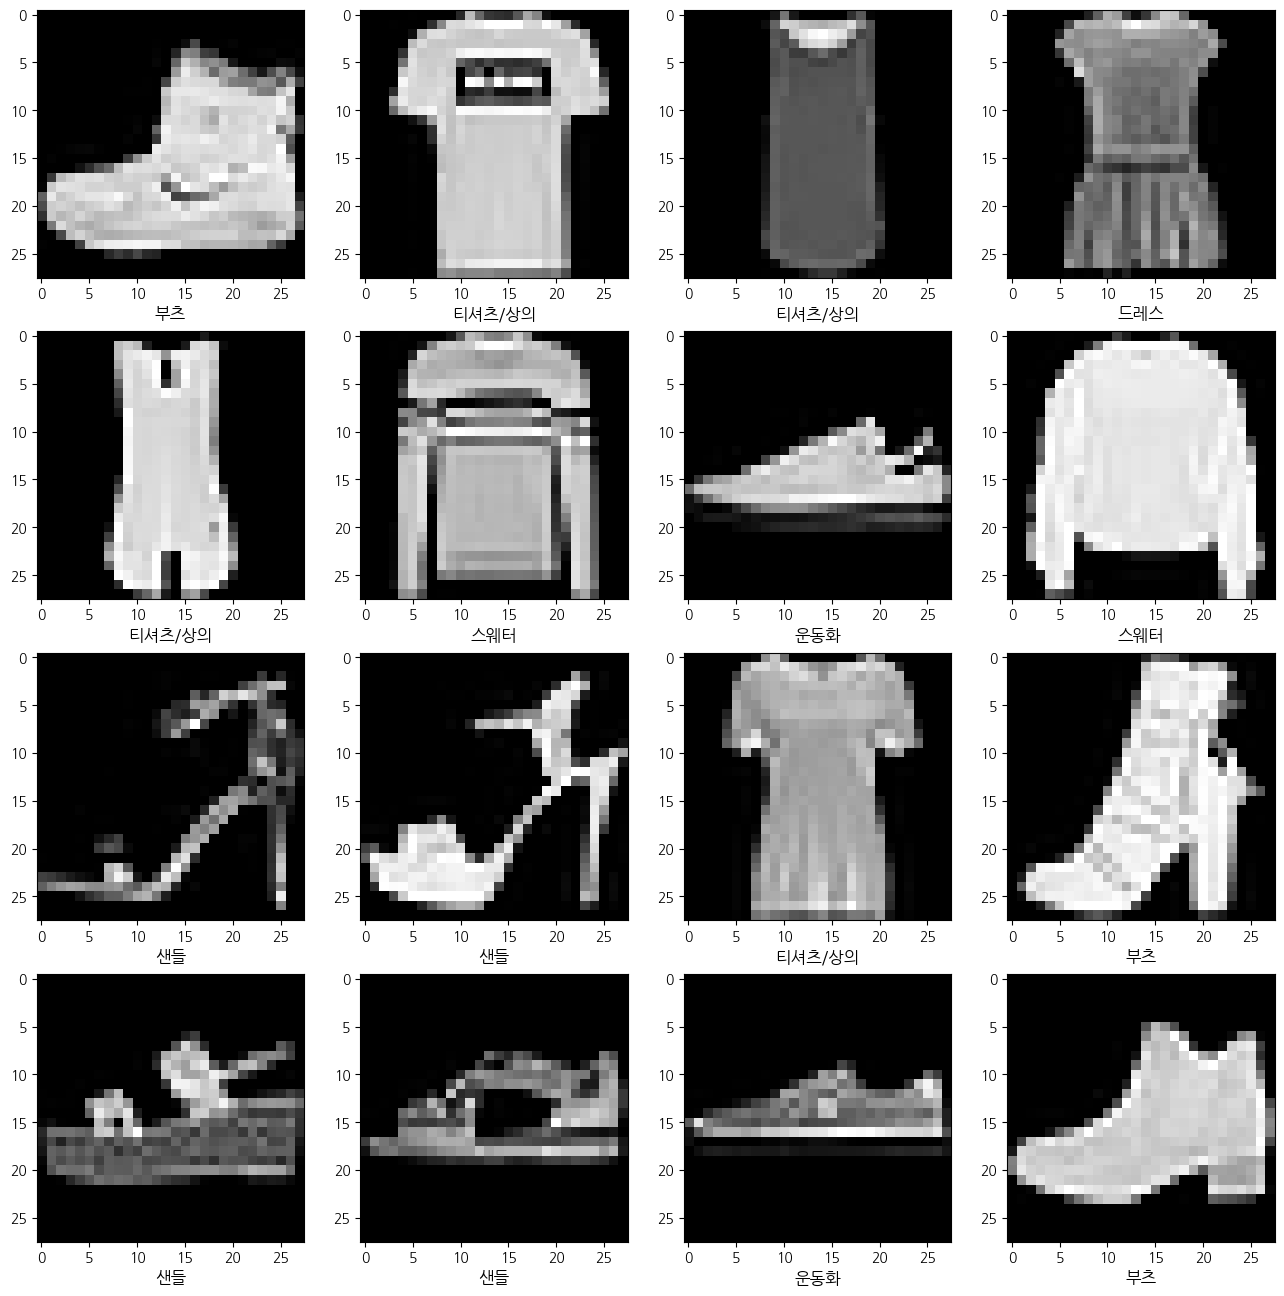

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [18]:
# 데이터를 확인해 보기
import matplotlib.pyplot as plt

# Fashion MNIST Label번호를 범주로 변환해주는 Dictionary만들기
nums = [0,1,2,3,4,5,6,7,8,9]
labels = ['티셔츠/상의','바지','스웨터','드레스','코트','샌들','셔츠','운동화','가방','부츠']
fashion_mnist_label_dict = {}

for num, label in zip(nums, labels):
    fashion_mnist_label_dict[num] = label
    
print(fashion_mnist_label_dict)

# 전체 그래프의 크기를 width=16, height=16으로 지정한다.
plt.figure(figsize = (16,16))
for c in range(16):
    # 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그린다.(1칸부터 16칸까지)
    plt.subplot(4, 4, c+1)
    # 그래프를 그리기 위한 데이터는 2차원이어야 하기 때문에 reshape()를 이용해서 다시 2차원으로 변환해야 한다.
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    plt.xlabel(fashion_mnist_label_dict[train_Y[c]], fontsize=12)
    
# plt.tight_layout()
plt.show()

# 훈련데이터의 첫번째부터 16번째까지의 라벨을 프린트한다.
print(train_Y[:16])